# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset

In [3]:
data=pd.read_excel('PAE_Home-Assignment_Data.xlsx')
data

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches
0,1261,1,2018-03-12,18,2373,2563,173376,1,0,6,5
1,1261,2,2018-03-13,15,2453,2765,115584,1,0,1,5
2,1261,3,2018-03-14,22,3296,4627,86688,1,0,2,5
3,1261,4,2018-03-15,45,6337,7121,173376,1,0,2,3
4,1261,5,2018-03-16,27,4393,4968,260064,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
13639,1750,3,2018-04-29,33,4683,4773,104985,1,0,5,6
13640,1750,4,2018-04-30,37,4275,5036,115948,2,0,8,4
13641,1980,1,2018-04-27,31,2928,3130,202608,1,0,3,4
13642,1700,1,2018-04-30,4,192,433,37906,3,0,8,8


In [4]:
data.shape

(13644, 11)

# Exploratory Data Analysis

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
acct_id,13644.0,1716.179420,286.854475,1200.0,1456.00,1716.0,1971.00,2200.0
visit_num,13644.0,21.128042,23.935015,1.0,5.00,12.0,29.00,153.0
clip_views,13644.0,21.432498,24.241938,1.0,6.00,15.0,31.00,910.0
view_time_sec,13644.0,4026.209469,3848.833272,12.0,1205.00,2974.5,5702.25,40086.0
total_clip_length_sec,13644.0,5324.848798,5976.236783,12.0,1519.00,3819.0,7390.50,208513.0
total_course_lngth_sec,13644.0,250505.335605,410910.030064,1000.0,44507.75,122856.0,295507.25,12069725.0
courses_viewed,13644.0,1.483949,1.103707,1.0,1.00,1.0,2.00,22.0
b2b_visit_indicator,13644.0,0.516931,0.499732,0.0,0.00,1.0,1.00,1.0
page_views,13644.0,4.298373,3.178949,1.0,2.00,3.0,6.00,19.0
searches,13644.0,1.888156,2.442407,0.0,0.00,1.0,3.00,14.0


# Finding Missing values

In [6]:
missing_values=data.isna().sum()
missing_values

acct_id                   0
visit_num                 0
visit_dt                  0
clip_views                0
view_time_sec             0
total_clip_length_sec     0
total_course_lngth_sec    0
courses_viewed            0
b2b_visit_indicator       0
page_views                0
searches                  0
dtype: int64

# Extracting date informations

In [7]:
data['Date']=pd.to_datetime(data['visit_dt'],format="%d/%m/%Y")
data['WeekDay']=data["Date"].dt.day_name()
data['month']=data["Date"].dt.month

In [8]:
data

,acct_id,visit_num,visit_dt,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches,Date,WeekDay,month
0,1261,1,2018-03-12,18,2373,2563,173376,1,0,6,5,2018-03-12,Monday,3
1,1261,2,2018-03-13,15,2453,2765,115584,1,0,1,5,2018-03-13,Tuesday,3
2,1261,3,2018-03-14,22,3296,4627,86688,1,0,2,5,2018-03-14,Wednesday,3
3,1261,4,2018-03-15,45,6337,7121,173376,1,0,2,3,2018-03-15,Thursday,3
4,1261,5,2018-03-16,27,4393,4968,260064,1,0,4,0,2018-03-16,Friday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,1750,3,2018-04-29,33,4683,4773,104985,1,0,5,6,2018-04-29,Sunday,4
13640,1750,4,2018-04-30,37,4275,5036,115948,2,0,8,4,2018-04-30,Monday,4
13641,1980,1,2018-04-27,31,2928,3130,202608,1,0,3,4,2018-04-27,Friday,4
13642,1700,1,2018-04-30,4,192,433,37906,3,0,8,8,2018-04-30,Monday,4


In [9]:
df=data.drop(['visit_dt','Date'],axis=1)
df.head(10)

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches,WeekDay,month
0,1261,1,18,2373,2563,173376,1,0,6,5,Monday,3
1,1261,2,15,2453,2765,115584,1,0,1,5,Tuesday,3
2,1261,3,22,3296,4627,86688,1,0,2,5,Wednesday,3
3,1261,4,45,6337,7121,173376,1,0,2,3,Thursday,3
4,1261,5,27,4393,4968,260064,1,0,4,0,Friday,3
5,1261,6,19,2281,3699,187824,1,0,7,0,Saturday,3
6,1261,7,6,1452,1452,57792,1,0,5,1,Sunday,3
7,1261,8,34,5593,6436,332304,1,0,1,0,Monday,3
8,1261,9,42,8272,8529,404544,1,0,4,0,Tuesday,3
9,1261,10,12,2967,2967,56371,1,0,1,1,Tuesday,4


In [46]:
a=df.view_time_sec.mean()
b=df.view_time_sec.max()
c=df.view_time_sec.min()
print('avg time spent',a)
print('Max time spent',b)
print('min time spent',c)

avg time spent 4026.209469363823
Max time spent 40086
min time spent 12


In [10]:
df['courses_viewed'].value_counts()

1     9827
2     2420
3      780
4      311
5      144
6       71
7       39
9       12
8       12
10      10
13       4
11       3
18       3
12       2
15       2
19       2
20       1
22       1
Name: courses_viewed, dtype: int64

# Majority of learners view only 1 course

In [11]:
df.shape

(13644, 12)

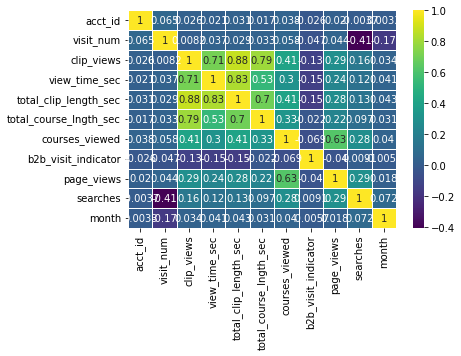

In [44]:
cor_data=data.corr()
sns.heatmap(cor_data,annot=True, cmap="viridis",linewidths=.5)
plt.show()

In [13]:
cor_data[abs(cor_data)>=0.5]

,acct_id,visit_num,clip_views,view_time_sec,total_clip_length_sec,total_course_lngth_sec,courses_viewed,b2b_visit_indicator,page_views,searches,month
acct_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_num,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clip_views,NaN,NaN,1.000000,0.705664,0.876934,0.793913,NaN,NaN,NaN,NaN,NaN
view_time_sec,NaN,NaN,0.705664,1.000000,0.825885,0.528140,NaN,NaN,NaN,NaN,NaN
total_clip_length_sec,NaN,NaN,0.876934,0.825885,1.000000,0.696013,NaN,NaN,NaN,NaN,NaN
total_course_lngth_sec,NaN,NaN,0.793913,0.528140,0.696013,1.000000,NaN,NaN,NaN,NaN,NaN
courses_viewed,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.625527,NaN,NaN
b2b_visit_indicator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
page_views,NaN,NaN,NaN,NaN,NaN,NaN,0.625527,NaN,1.000000,NaN,NaN
searches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


# Only 4-5 features such as clip_views,view_time_sec,total_clip_length_sec,  are highly correlated in this datset

In [14]:
df.dtypes

acct_id                    int64
visit_num                  int64
clip_views                 int64
view_time_sec              int64
total_clip_length_sec      int64
total_course_lngth_sec     int64
courses_viewed             int64
b2b_visit_indicator        int64
page_views                 int64
searches                   int64
WeekDay                   object
month                      int64
dtype: object

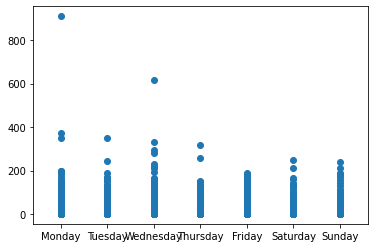

In [15]:
plt.scatter(df["WeekDay"], df["clip_views"])
plt.margins(x=0.1)
plt.show()

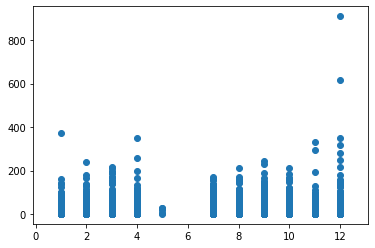

In [16]:
plt.scatter(df["month"], df["clip_views"])
plt.margins(x=0.1)
plt.show()

# From may to june very less clip_views is observed.

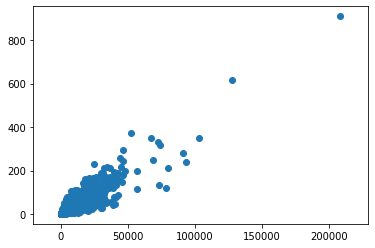

In [17]:
plt.scatter(df["total_clip_length_sec"], df["clip_views"])
plt.margins(x=0.1)
plt.show()

# people watches more lectures when clip length is short.

In [18]:
df.columns

Index(['acct_id', 'visit_num', 'clip_views', 'view_time_sec',
       'total_clip_length_sec', 'total_course_lngth_sec', 'courses_viewed',
       'b2b_visit_indicator', 'page_views', 'searches', 'WeekDay', 'month'],
      dtype='object')

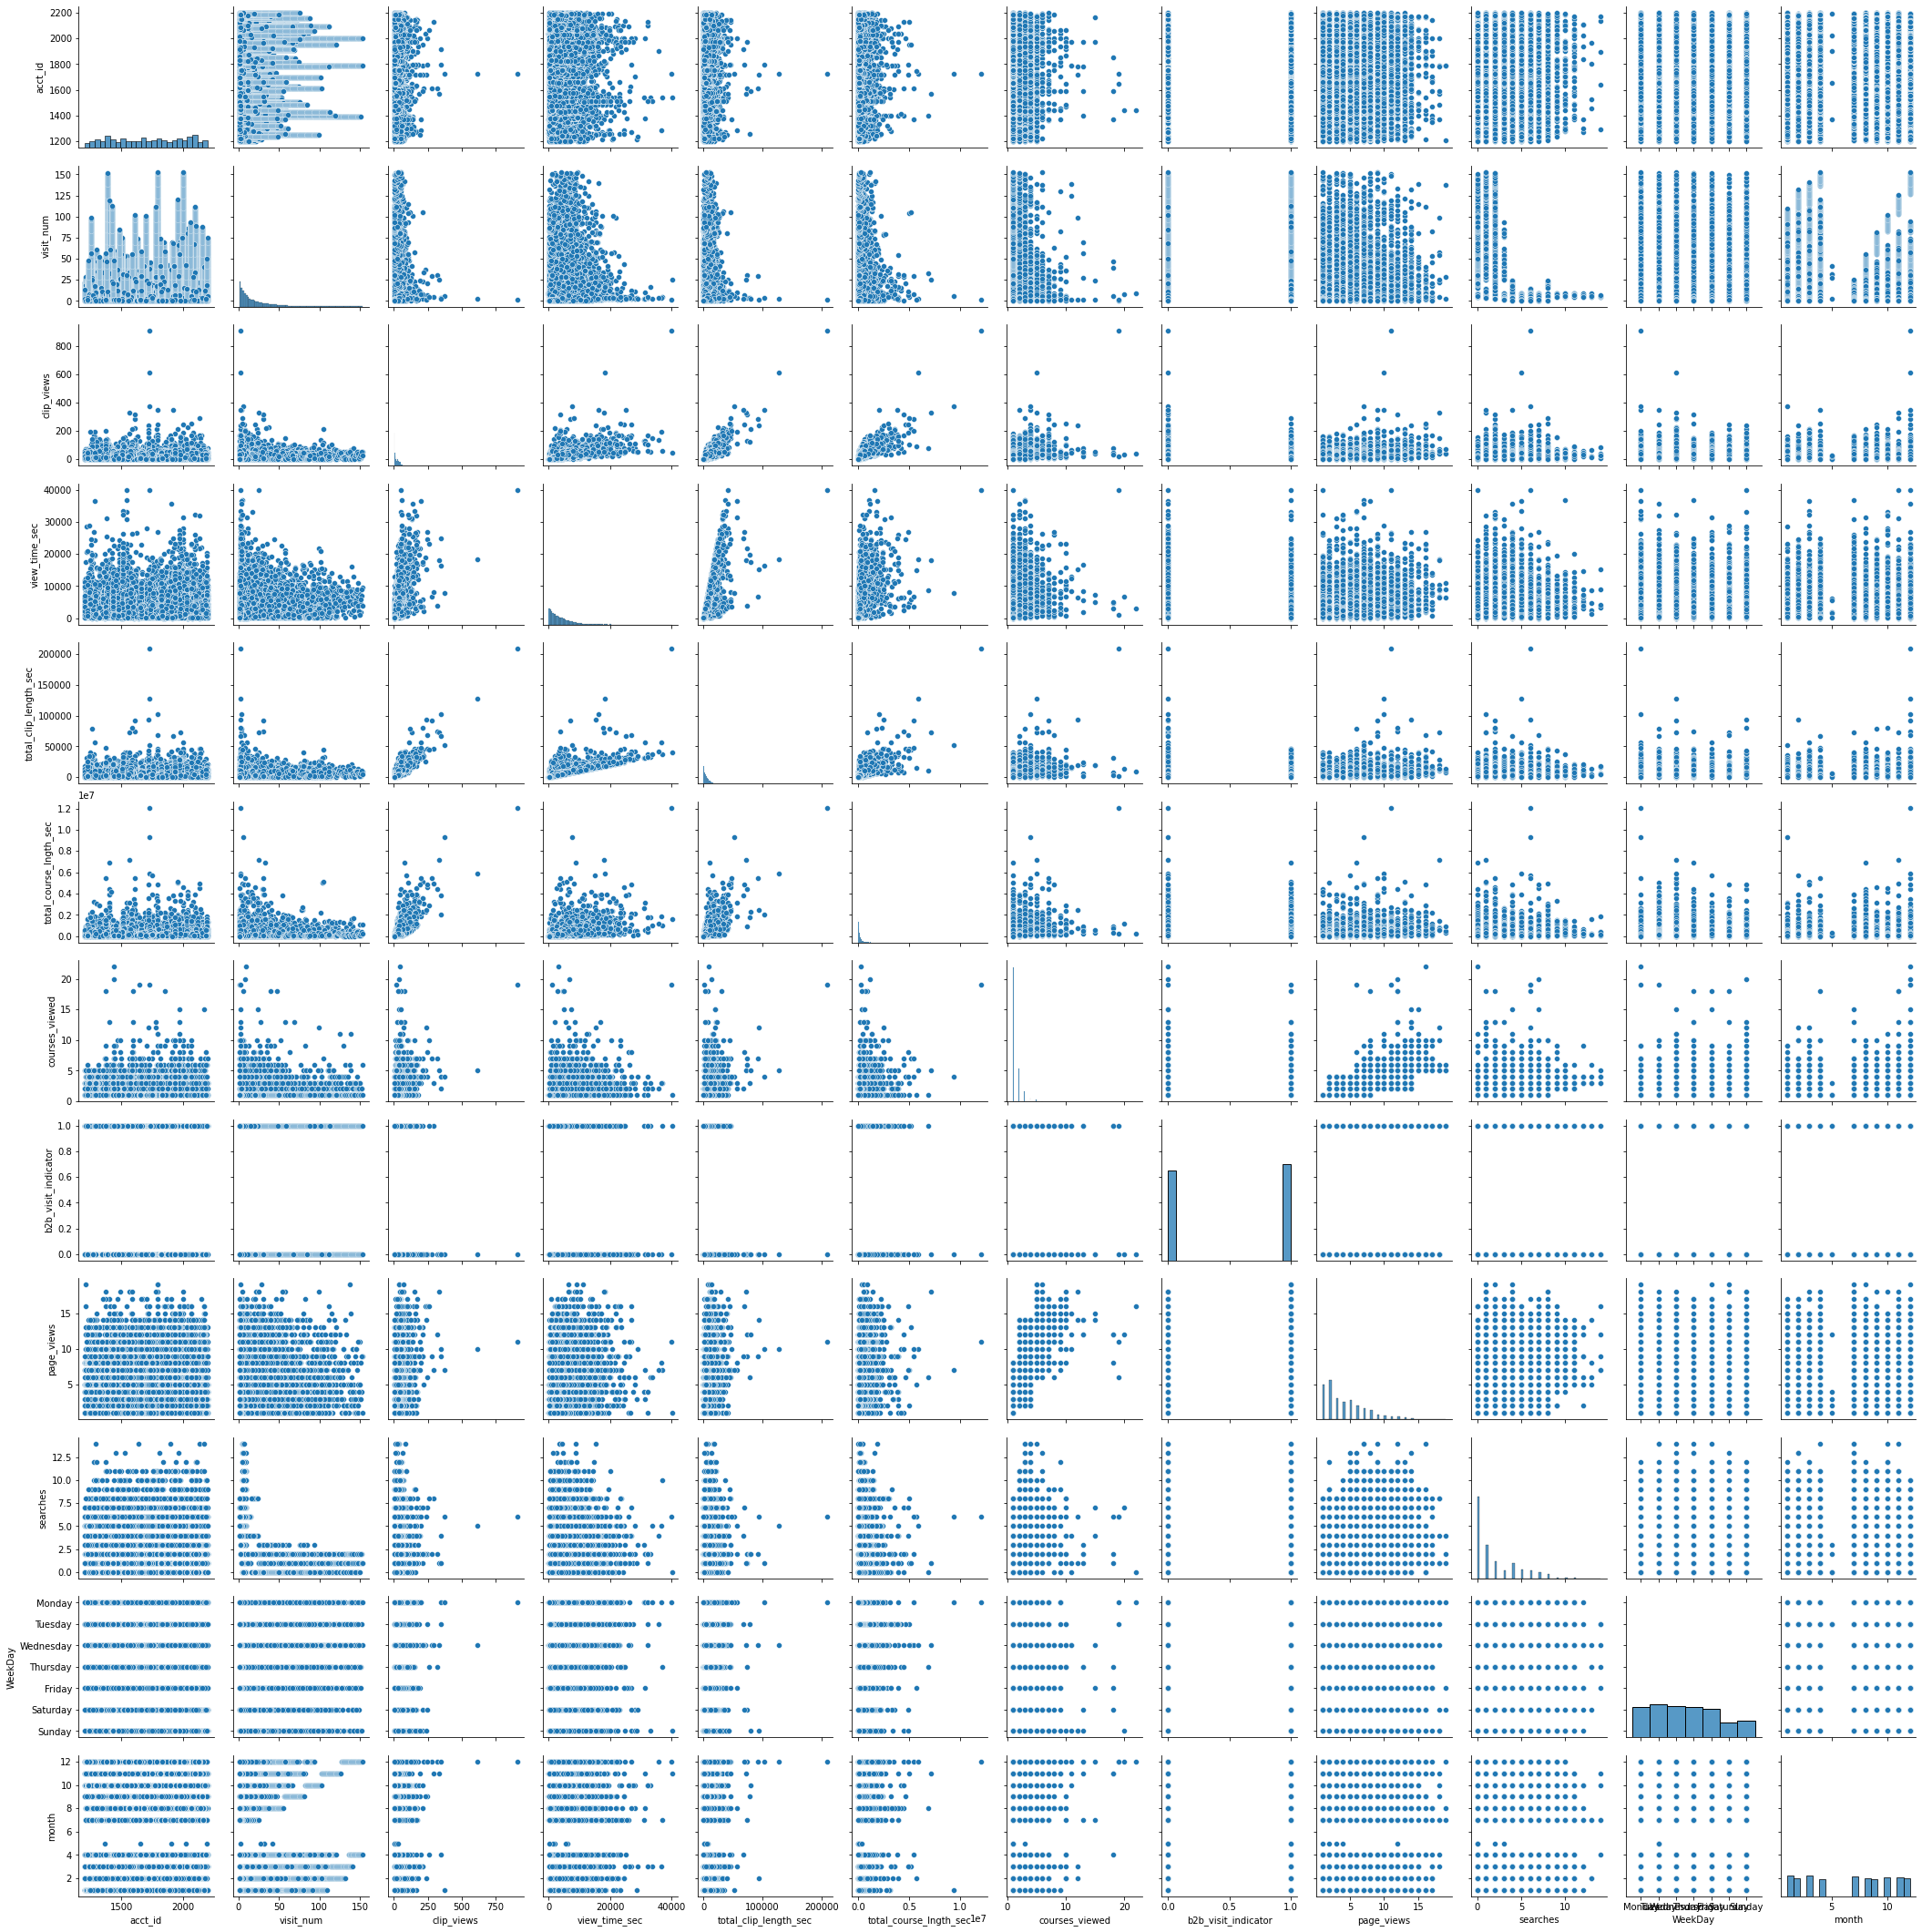

In [19]:
sns.pairplot(df, vars = ['acct_id', 'visit_num', 'clip_views', 'view_time_sec','total_clip_length_sec', 'total_course_lngth_sec', 'courses_viewed','b2b_visit_indicator', 'page_views', 'searches', 'WeekDay', 'month'], dropna = True)
plt.show()

data has a major void in the month of may and june
majority of featres are  constant or linearly dependent on each other 



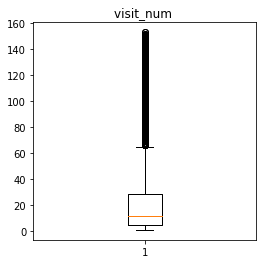

In [20]:
plt.figure(figsize=(4,4))
plt.boxplot(df['visit_num'])
plt.title("visit_num ")
plt.show()

outliers after 60 visit

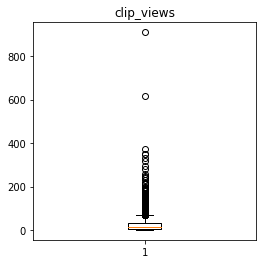

In [21]:
plt.figure(figsize=(4,4))
plt.boxplot(df['clip_views'])
plt.title("clip_views")
plt.show()

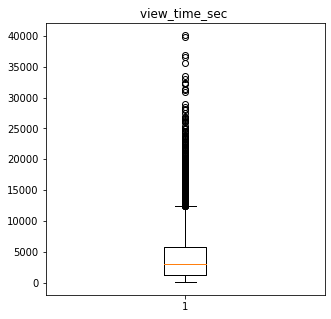

In [22]:
plt.figure(figsize=(5,5))
plt.boxplot(df['view_time_sec'])
plt.title("view_time_sec ")
plt.show()

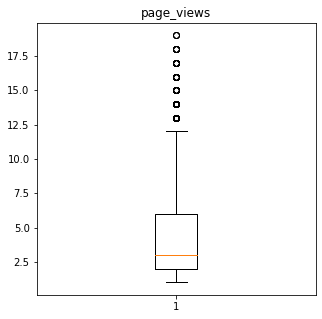

In [23]:
plt.figure(figsize=(5,5))
plt.boxplot(df['page_views'])
plt.title("page_views")
plt.show()

features such as visit num , clip vew has lots of outliers which might produce not so accurate prediction while modeling

/Users/musubimanagement/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


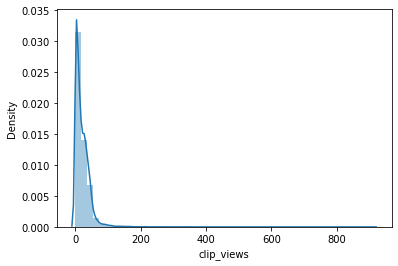

In [24]:
ax = sns.distplot(df['clip_views'])
plt.show()

/Users/musubimanagement/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/musubimanagement/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


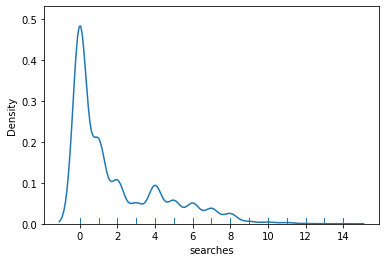

In [25]:
ax = sns.distplot(df['searches'], rug=True, hist=False)
plt.show()

very few people uses the search option

/Users/musubimanagement/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/musubimanagement/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


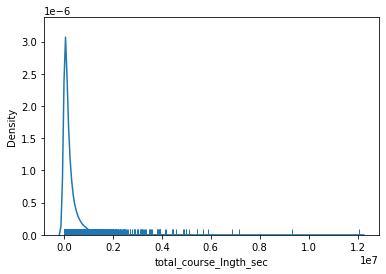

In [26]:
ax = sns.distplot(df['total_course_lngth_sec'], rug=True, hist=False)
plt.show()

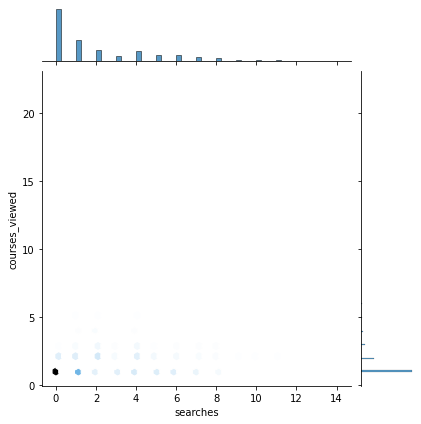

In [27]:
sns.jointplot(x = "searches", y = "courses_viewed",
              kind = "hex", data = data)
# show the plot
plt.show()

learners perform searches only for 1-3 courses

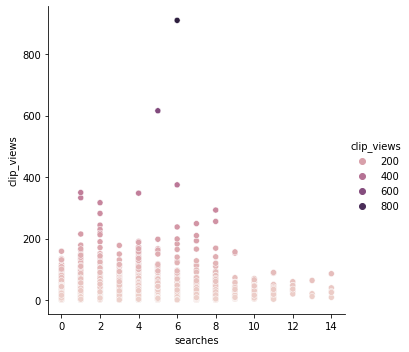

In [30]:
sns.relplot(x='searches', y='clip_views', hue='searches', data=df)
plt.show()

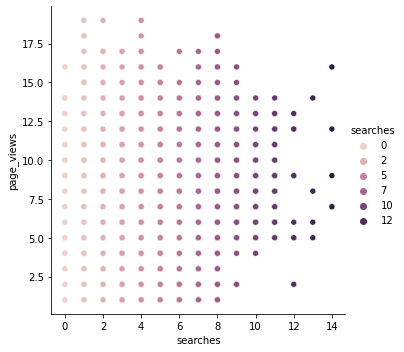

In [31]:
sns.relplot(x='searches', y='page_views', hue='searches', data=df)
plt.show()

<AxesSubplot:>

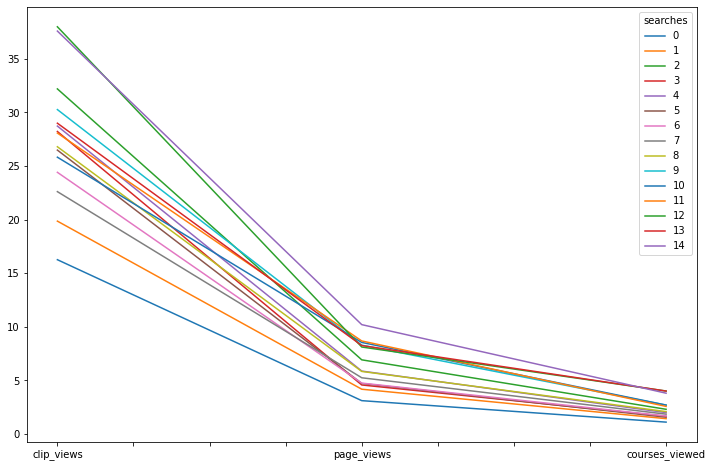

In [32]:
df.groupby('searches')[['clip_views', 'page_views', 'courses_viewed']].mean().T.plot(figsize=(12,8))

# learner perform more searches based on clip views and less serches based on courses_viewed

<AxesSubplot:xlabel='visit_num'>

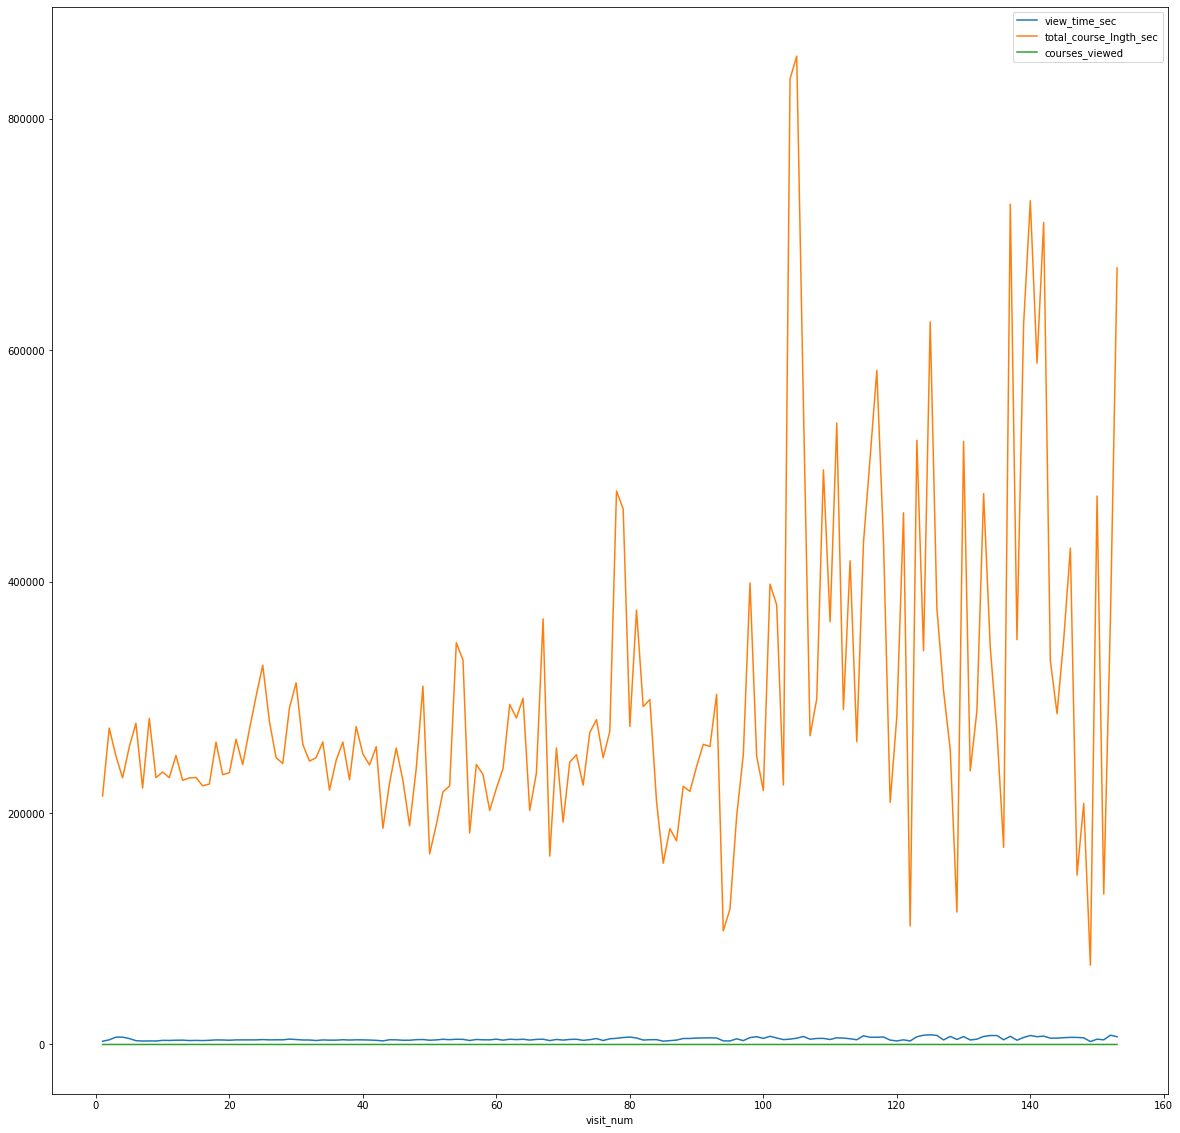

In [41]:
df.groupby('visit_num')[['view_time_sec', 'total_course_lngth_sec', 'courses_viewed']].mean().plot(figsize=(20,20))

# Bigger course length has more number of visit

<AxesSubplot:xlabel='clip_views'>

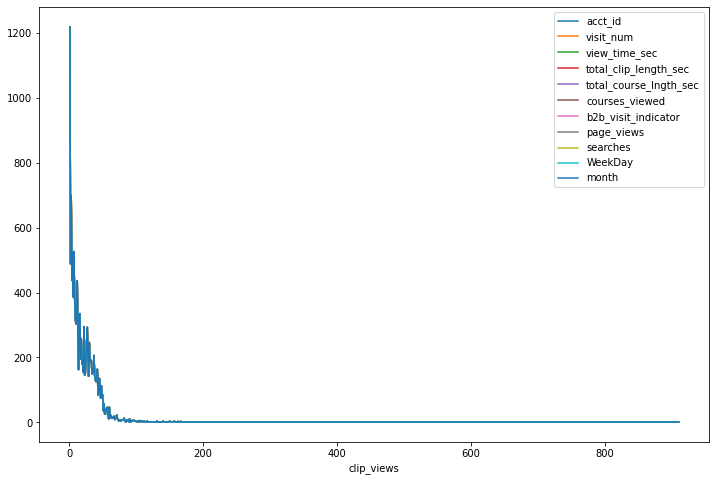

In [51]:
df.groupby('clip_views').count().plot(figsize=(12,8))

In [52]:
a=df.total_clip_length_sec.unique()
print('avg length of a clip is',a.mean())
print('Min length of a clip is', a.min())
print('Max length of a clip is', a.max())

avg length of a clip is 6802.4833889094725
Min length of a clip is 12
Max length of a clip is 208513


<AxesSubplot:xlabel='total_clip_length_sec'>

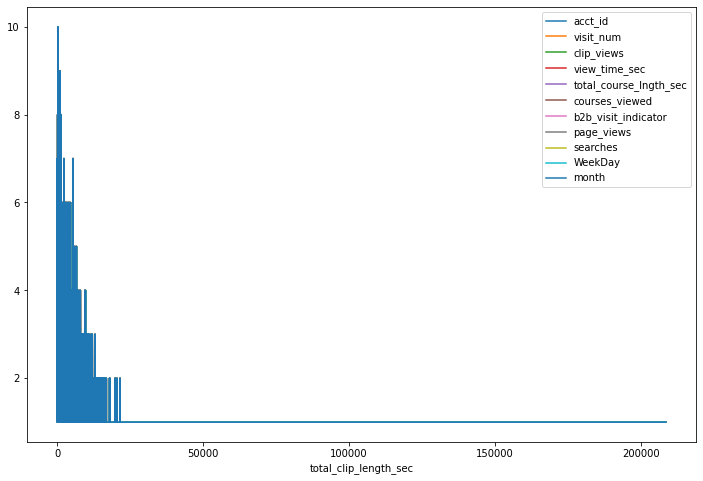

In [53]:
df.groupby('total_clip_length_sec').count().plot(figsize=(12,8))